In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

record_ID      week  store_id  sku_id  total_price  base_price  \
0               1  17/01/11      8091  216418      99.0375    111.8625   
1               2  17/01/11      8091  216419      99.0375     99.0375   
2               3  17/01/11      8091  216425     133.9500    133.9500   
3               4  17/01/11      8091  216233     133.9500    133.9500   
4               5  17/01/11      8091  217390     141.0750    141.0750   
...           ...       ...       ...     ...          ...         ...   
150145     212638  09/07/13      9984  223245     235.8375    235.8375   
150146     212639  09/07/13      9984  223153     235.8375    235.8375   
150147     212642  09/07/13      9984  245338     357.6750    483.7875   
150148     212643  09/07/13      9984  547934     141.7875    191.6625   
150149     212644  09/07/13      9984  679023     234.4125    234.4125   

        is_featured_sku  is_display_sku  units_sold  
0                     0               0          20  
1                     0               0          28  
2                     0               0          19  
3                     0               0          44  
4                     0               0          52  
...                 ...             ...         ...  
150145                0               0          38  
150146                0               0          30  
150147                1               1          31  
150148                0               1          12  
150149                0               0          15  

[150150 rows x 9 columns]

In [5]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)

In [6]:
df = df.drop('week', axis=1)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [9]:
# r squared
model.score(X_test, y_test)

0.776881750500747

In [10]:
# rmse
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

27.056960759438518

In [11]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

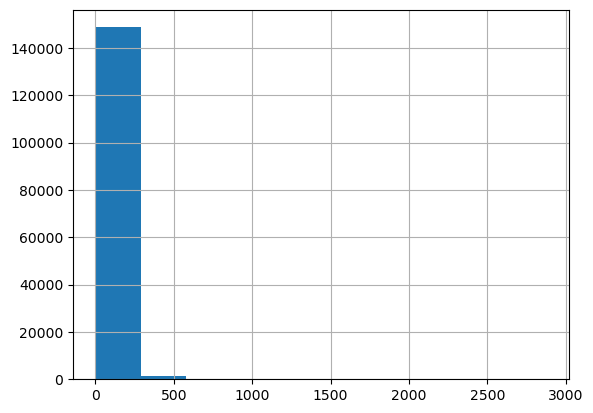

In [12]:
df.units_sold.hist()

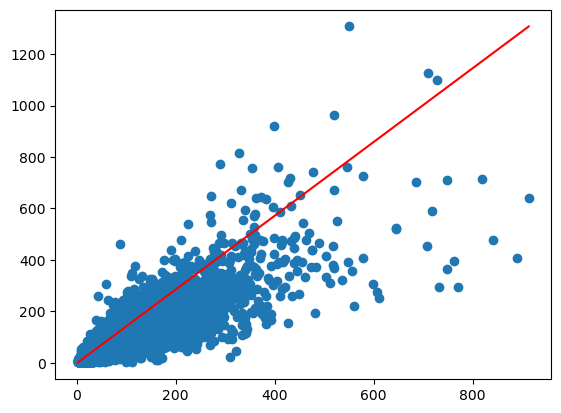

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color="red")

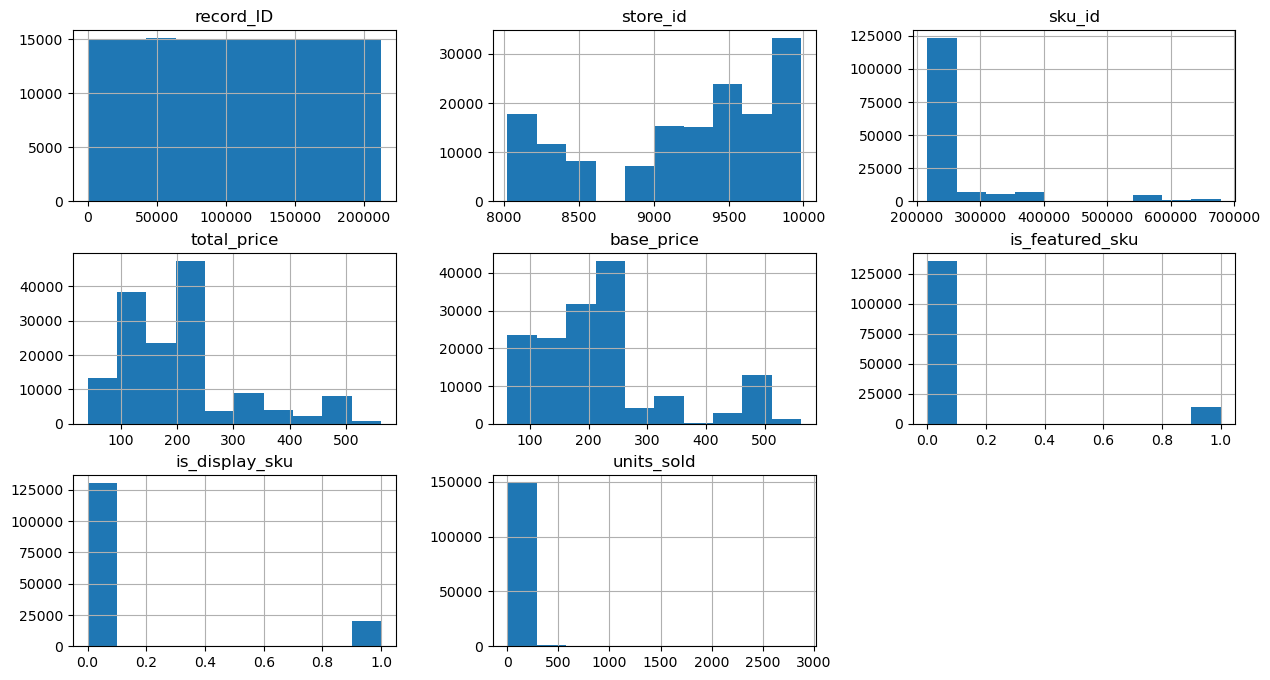

In [14]:
df.hist(figsize=(15,8))
plt.show()

In [15]:
# handle distribution / outliers
# look at store id and sku id to see how many unique values. might make sense to do one hot coding

In [16]:
# drop record ID
df = df.drop('record_ID', axis=1)

In [17]:
len(df.store_id.unique())

76

In [18]:
len(df.sku_id.unique())

28

In [19]:
# one hot encoding for store id

In [20]:
df.units_sold.quantile(0.99)

np.float64(283.0)

In [21]:
# drop all values above this threshold
df = df[df.units_sold < df.units_sold.quantile(0.99)]

<Axes: >

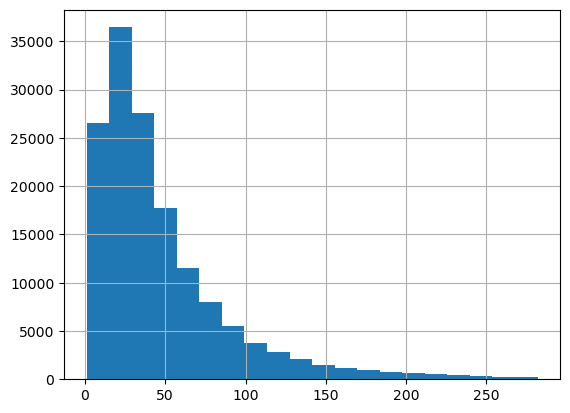

In [22]:
df.units_sold.hist(bins=20)

In [23]:
# pre processing
# one hot encoding for store id and sku_id and join to df
df = df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis=1)
df = df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id', axis=1)

In [24]:
model = RandomForestRegressor(n_jobs=-1)

X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [26]:
model.score(X_test, y_test)

0.8258737750711624

In [27]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

17.812328411350375

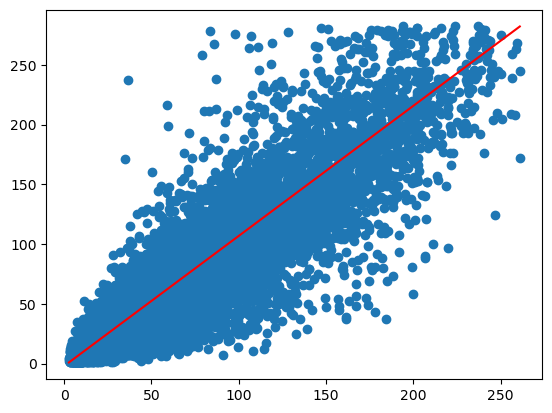

In [28]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color="red")

In [29]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3, scoring='neg_root_mean_squared_error')

grid_search.fit(X, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  10.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  10.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  10.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=  15.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=  15.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=  14.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   9.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=  10.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=  11.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=150; total time=  18.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=150; total time=  16.7s
[CV] END max_depth=None, mi

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [30]:
best_model = grid_search.best_estimator_

In [31]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}

In [32]:
best_model.score(X_test, y_test)

0.9608175075969322

In [33]:

# Fit the original baseline model for comparison
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

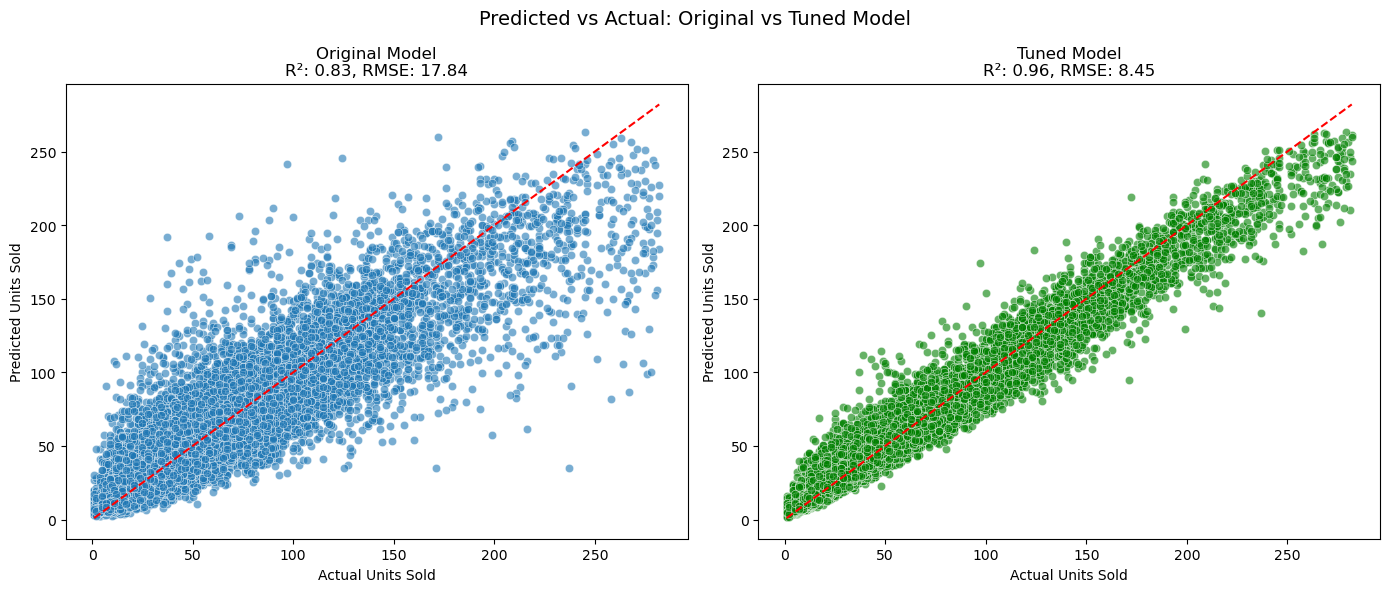

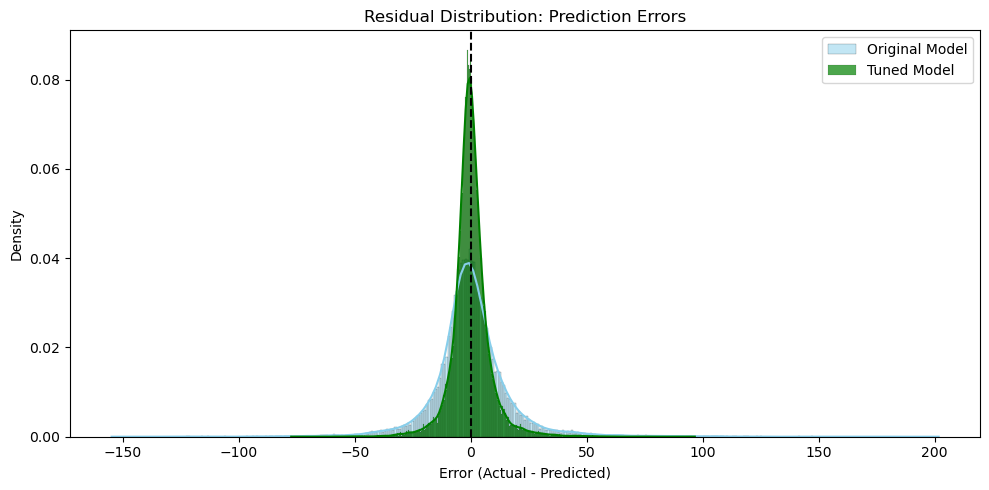

In [40]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_old = model.predict(X_test)
y_pred_new = best_model.predict(X_test)

r2_old = r2_score(y_test, y_pred_old)
r2_new = r2_score(y_test, y_pred_new)

import numpy as np
rmse_old = np.sqrt(mean_squared_error(y_test, y_pred_old))
rmse_new = np.sqrt(mean_squared_error(y_test, y_pred_new))

# Plot 1: Predicted vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_old, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Original Model\nR²: {r2_old:.2f}, RMSE: {rmse_old:.2f}")
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_new, alpha=0.6, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Tuned Model\nR²: {r2_new:.2f}, RMSE: {rmse_new:.2f}")
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")

plt.suptitle("Predicted vs Actual: Original vs Tuned Model", fontsize=14)
plt.tight_layout()
plt.show()

# Plot 2: Residuals
residuals_old = y_test - y_pred_old
residuals_new = y_test - y_pred_new

plt.figure(figsize=(10, 5))
sns.histplot(residuals_old, color="skyblue", kde=True, label="Original Model", stat="density")
sns.histplot(residuals_new, color="green", kde=True, label="Tuned Model", stat="density", alpha=0.7)
plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.title("Residual Distribution: Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


In [36]:
from joblib import dump
dump(best_model, "best_model.pkl")

['best_model.pkl']

In [37]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


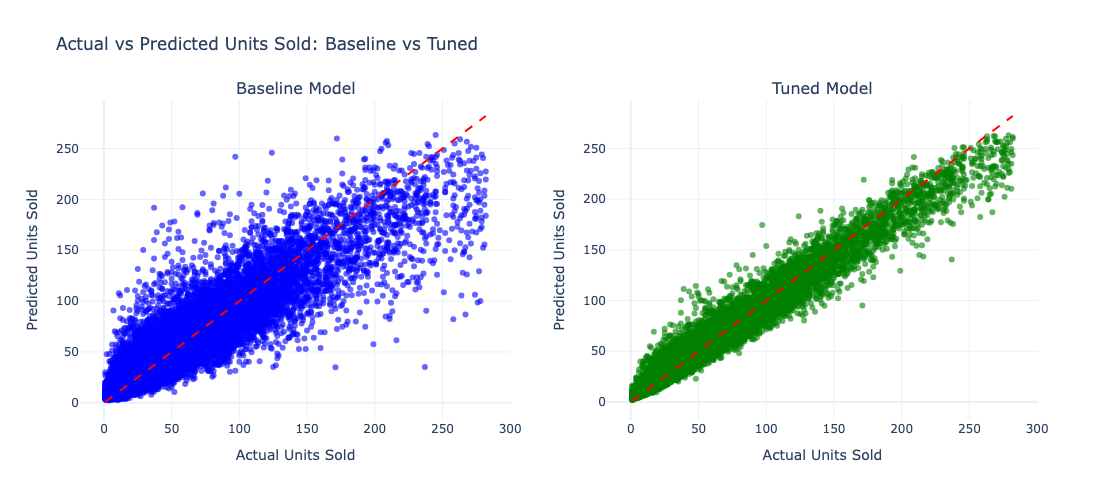

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

df_plot = pd.DataFrame({
    'Actual': y_test,
    'Baseline': model.predict(X_test),
    'Tuned': best_model.predict(X_test)
})

# Create grid
fig = make_subplots(rows=1, cols=2, subplot_titles=("Baseline Model", "Tuned Model"))

# Reference line range
min_val = min(df_plot.min())
max_val = max(df_plot.max())

# Baseline model scatter
fig.add_trace(go.Scatter(
    x=df_plot['Actual'],
    y=df_plot['Baseline'],
    mode='markers',
    name='Baseline Prediction',
    marker=dict(color='blue', size=6, opacity=0.6)
), row=1, col=1)

# 45-degree line (Baseline)
fig.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    line=dict(color='red', dash='dash'),
    showlegend=False
), row=1, col=1)

# Tuned model scatter
fig.add_trace(go.Scatter(
    x=df_plot['Actual'],
    y=df_plot['Tuned'],
    mode='markers',
    name='Tuned Prediction',
    marker=dict(color='green', size=6, opacity=0.6)
), row=1, col=2)

# 45-degree line (Tuned)
fig.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    line=dict(color='red', dash='dash'),
    showlegend=False
), row=1, col=2)

fig.update_layout(
    title_text="Actual vs Predicted Units Sold: Baseline vs Tuned",
    height=500,
    template="plotly_white",
    showlegend=False
)

fig.update_xaxes(title_text="Actual Units Sold", row=1, col=1)
fig.update_yaxes(title_text="Predicted Units Sold", row=1, col=1)
fig.update_xaxes(title_text="Actual Units Sold", row=1, col=2)
fig.update_yaxes(title_text="Predicted Units Sold", row=1, col=2)

fig.show()


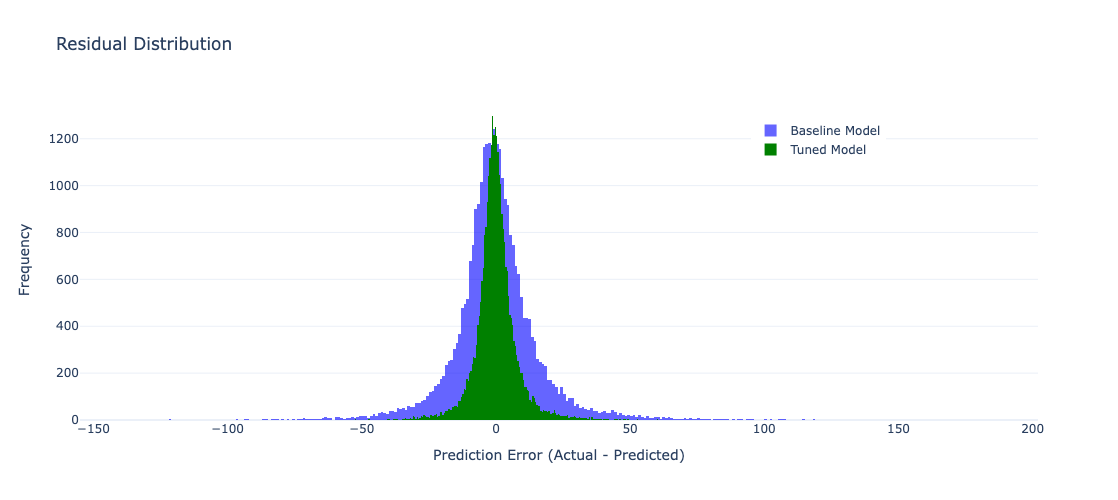

In [52]:
import numpy as np
import plotly.graph_objects as go

residuals_old = y_test - model.predict(X_test)
residuals_new = y_test - best_model.predict(X_test)

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=residuals_old,
    name='Baseline Model',
    opacity=0.6,
    marker_color='blue'
))

fig.add_trace(go.Histogram(
    x=residuals_new,
    name='Tuned Model',
    opacity=1,
    marker_color='green'
))

fig.update_layout(
    barmode='overlay',
    title='Residual Distribution',
    xaxis_title='Prediction Error (Actual - Predicted)',
    yaxis_title='Frequency',
    height=500,  # Set plot height here
    legend=dict(x=0.7, y=0.95),
    template='plotly_white'
)

fig.show()
